In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class LinearRegression:
    def __init__(self, alpha = 0.00001, n_iters = 200):
        self.intercept = 7
        self.slope = 1
        self.n_iters = n_iters
        self.alpha = alpha
        self.n = None
    
    def intercept_gradient(self, y_pred, y_train):
        sum = 0
        for i in range(self.n):
            sum += y_pred[i] - y_train[i]
        delta_b = -2/self.n * sum
        return delta_b
    
    def slope_gradient(self, y_pred, y_train, x_train):
        sum = 0
        for i in range(self.n):
            sum += (y_pred[i] - y_train[i]) * x_train[i]
        delta_m = -2/self.n * sum
        return delta_m
    
    def loss_function(self, y_pred, y_train):
        return 1/self.n * np.sum([(y_pred[i] - y_train[i]) ** 2 for i in range(self.n)])

    def fit(self, x_train, y_train):
        self.n = len(y_train)
        loss = 1000000000
        for j in range(self.n_iters):
            y_pred = [self.slope * x_train[i] + self.intercept for i in range(self.n)]
            new_loss = self.loss_function(y_pred, y_train)
            self.slope += self.alpha * self.slope_gradient(y_pred,y_train, x_train)
            self.intercept += self.alpha * self.intercept_gradient(y_pred, y_train)
            new_loss
            print(f'Iter: {j}, Loss: {new_loss}')

In [3]:
df = pd.read_csv('./advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


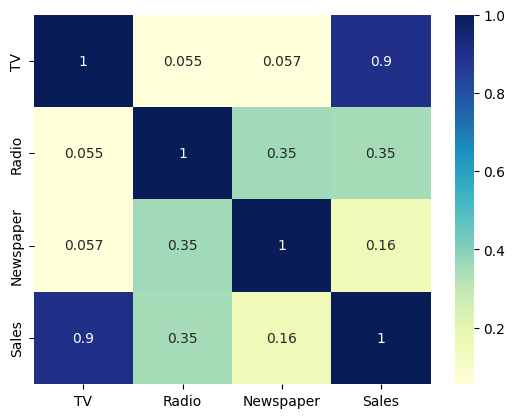

In [4]:
sns.heatmap(data = df.corr(),cmap="YlGnBu",  annot = True)
plt.show()

Iter: 0, Loss: 25844.850999999995
Iter: 1, Loss: 4582.302478994894
Iter: 2, Loss: 815.9764069740105
Iter: 3, Loss: 148.83097674554676
Iter: 4, Loss: 30.656656050412376
Iter: 5, Loss: 9.723933679136268
Iter: 6, Loss: 6.016031121450955
Iter: 7, Loss: 5.359234497077681
Iter: 8, Loss: 5.2428933037067615
Iter: 9, Loss: 5.222285290134973
Iter: 10, Loss: 5.218634903758198
Iter: 11, Loss: 5.217988294344529
Iter: 12, Loss: 5.217873756779149
Iter: 13, Loss: 5.2178534673737476
Iter: 14, Loss: 5.217849872547642
Iter: 15, Loss: 5.217849234903713
Iter: 16, Loss: 5.217849121078107
Iter: 17, Loss: 5.217849100038689
Iter: 18, Loss: 5.21784909543489
Iter: 19, Loss: 5.217849093742414
Iter: 20, Loss: 5.2178490925656416
Iter: 21, Loss: 5.217849091480225
Iter: 22, Loss: 5.217849090411002
Iter: 23, Loss: 5.217849089344655
Iter: 24, Loss: 5.217849088278829
Iter: 25, Loss: 5.2178490872131
Iter: 26, Loss: 5.2178490861474005
Iter: 27, Loss: 5.2178490850817125
Iter: 28, Loss: 5.217849084016037
Iter: 29, Loss: 5.2

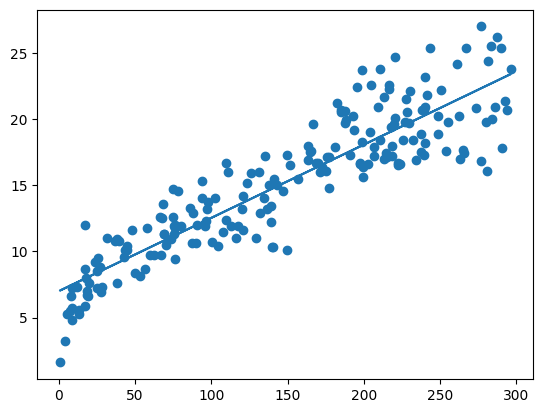

In [5]:
x_train = df['TV']
y_train = df['Sales']
lnr = LinearRegression()
lnr.fit(x_train=x_train, y_train=y_train)
y_pred = [lnr.slope * x + lnr.intercept for x in x_train]
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred)
plt.show()

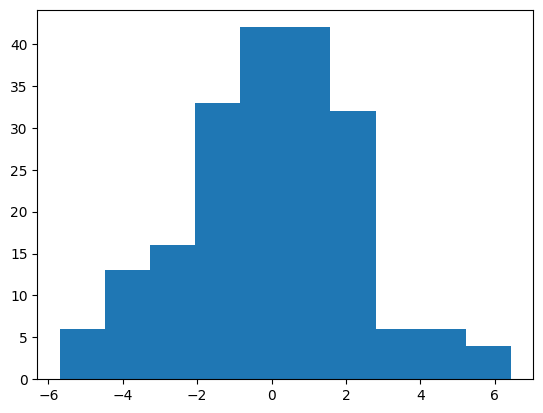

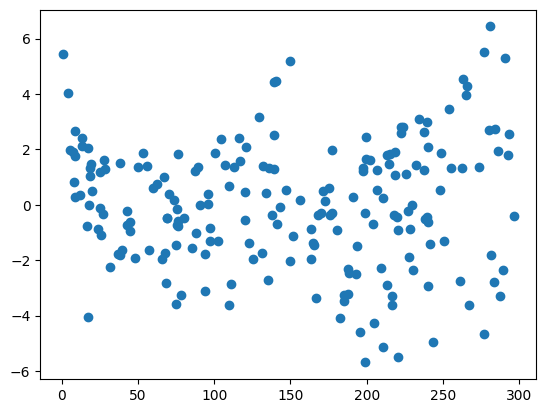

In [12]:
res = y_pred - y_train
plt.hist(res)
plt.show()
plt.clf()

plt.scatter(x = x_train, y = res)

In [7]:
from scipy.stats import ttest_1samp

result = ttest_1samp(res, 0)
result

TtestResult(statistic=np.float64(0.03184775120468728), pvalue=np.float64(0.9746253851042455), df=np.int64(199))